# Visualize manual ratings

## Load simulated or collected manual ratings

In [1]:
df <- readRDS(("../../data/simulated_normal_ratings.rds"))
df <- df[, !names(df) %in% c("dataset", "artifacts", "time_sec", "confidence", "comments")]

df

sub,defaced,rater,ratings
<int>,<fct>,<fct>,<dbl>
1,original,rater01,19
1,defaced,rater01,19
2,original,rater01,27
2,defaced,rater01,27
3,original,rater01,19
3,defaced,rater01,19
4,original,rater01,16
4,defaced,rater01,16
5,original,rater01,34


### Plot ratings distribution

To verify that a bias is visible in the data, we plot for each rater the ratings distribution differentially for the defaced vs original conditions.

In [2]:
## Create dataframe with frequency counts
df_small <- data.frame(rater = df$rater, ratings = df$ratings, defaced =df$defaced)
conTable <- table(df_small)
df_freq <- as.data.frame(conTable)
df_freq

rater,ratings,defaced,Freq
<fct>,<fct>,<fct>,<int>
rater01,1,original,0
rater02,1,original,0
rater03,1,original,1
rater04,1,original,0
rater01,2,original,0
rater02,2,original,1
rater03,2,original,0
rater04,2,original,0
rater01,3,original,0


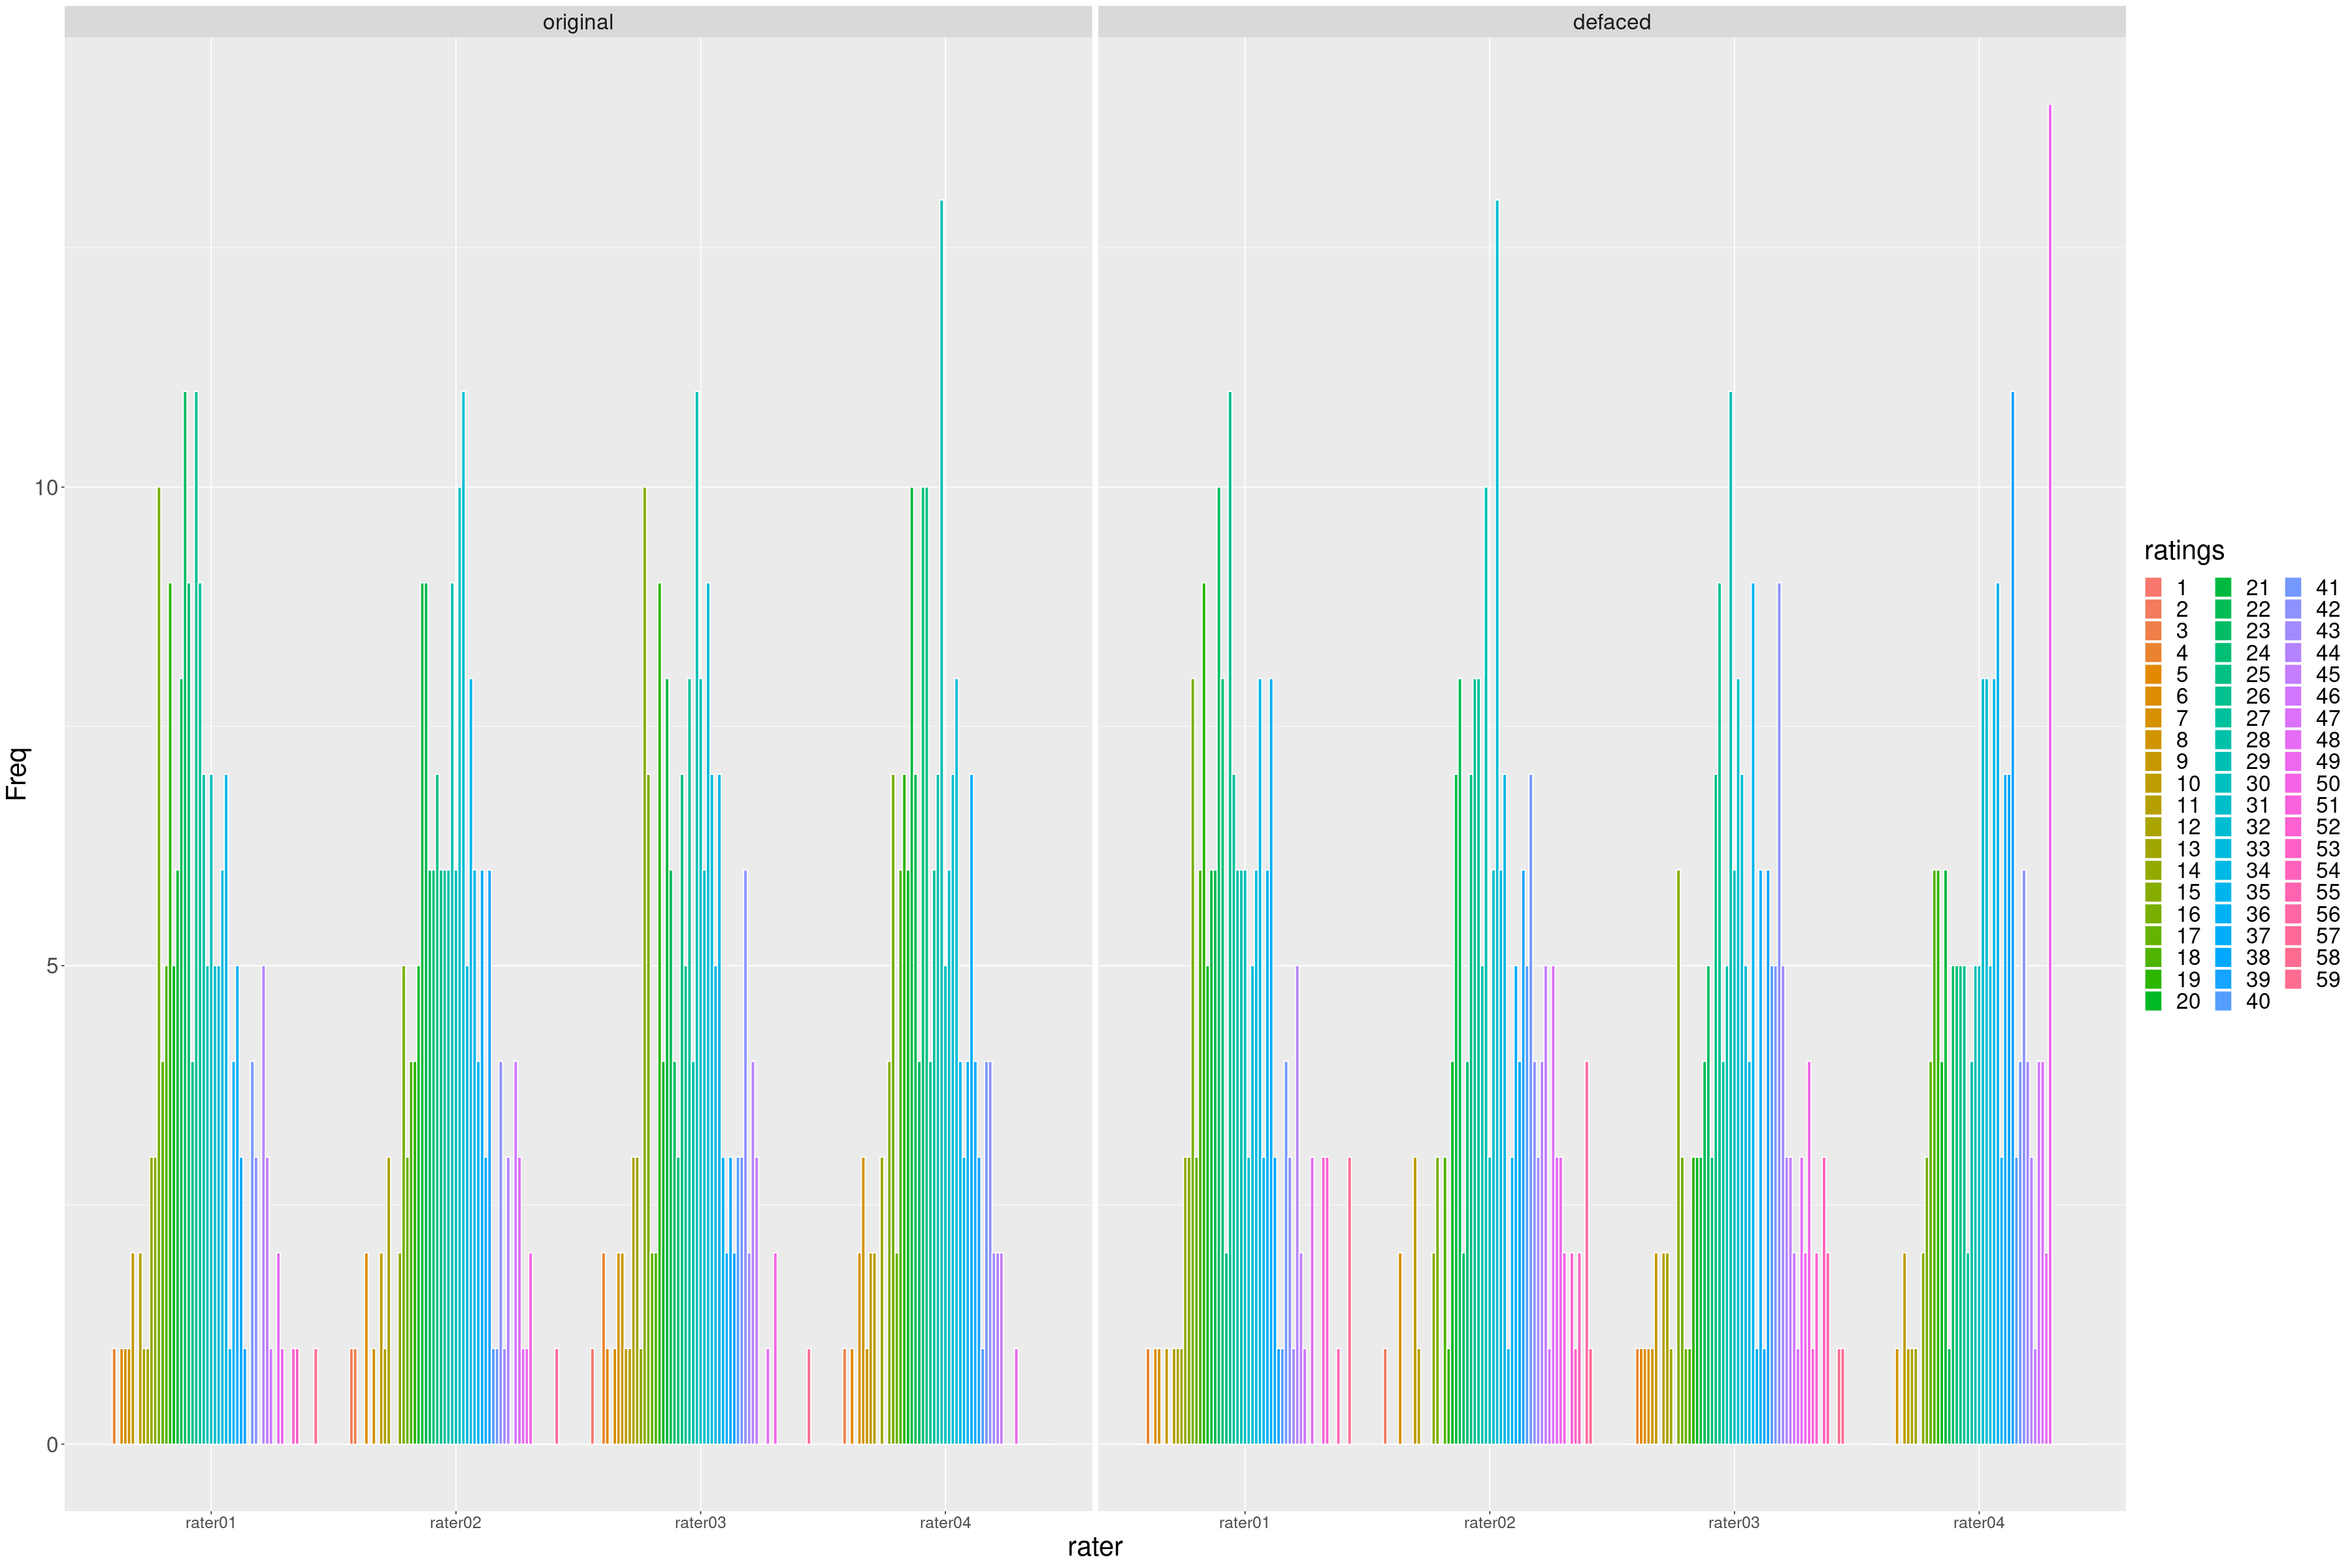

In [3]:
options(repr.plot.width = 30, repr.plot.height = 20)
library(ggplot2)
## Bar plot
ggplot(df_freq, aes(x = rater, y = Freq))+
  geom_bar(
    aes(fill = ratings), stat = "identity", color = "white",
    position = position_dodge(0.9) 
    )+
  facet_wrap(~defaced)+
  theme(text = element_text(size = 25))+
  theme(axis.text.x = element_text(size = 15))

## Continous ratings

Simulate human ratings of image quality. The ratings are randomly sampled from [0,1] at 0.1 increment and randomly distributed across subjects. To introduce a bias in the ratings of defaced images, we add +0.2 to a predefined precentage of the ratings on original images. The percentage of scan affected varies between raters. 

In [4]:
## Simulate continuous data with bias
n_rated <- 185
n_sub <- 185 #nbr of subjects available in the dataset
n_rater <- 4 #nbr of raters
perc_biased <- c(2,10,60,90) #4 raters + bias
ratings_range <- seq(0,1,length.out=11)
labels <- c('excluded','0.1','poor','0.3','acceptable','0.5','good','0.7','very good','0.9','excellent')
bias <- 0.2
file_name <- 'SimulatedData/SimulatedDefacedRatings_continuous.Rda'

source("simulate_data.R")

df_cont <- simulate_data(n_rated, n_sub, n_rater, perc_biased, ratings_range=ratings_range, labels=labels, bias=bias, file=file_name)

Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'simulate_data.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [ ]:
## Create dataframe with frequency counts
df_cont_small <- data.frame(rater = df_cont$rater, ratings = df_cont$ratings, defaced =df_cont$defaced)
conTable <- table(df_cont_small)
df_cont_freq <- as.data.frame(conTable)
df_cont_freq

rater,ratings,defaced,Freq
<fct>,<fct>,<fct>,<int>
rater01,excluded,original,52
rater02,excluded,original,57
rater03,excluded,original,47
rater04,excluded,original,52
rater01,0.1,original,50
rater02,0.1,original,49
rater03,0.1,original,55
rater04,0.1,original,49
rater01,poor,original,62


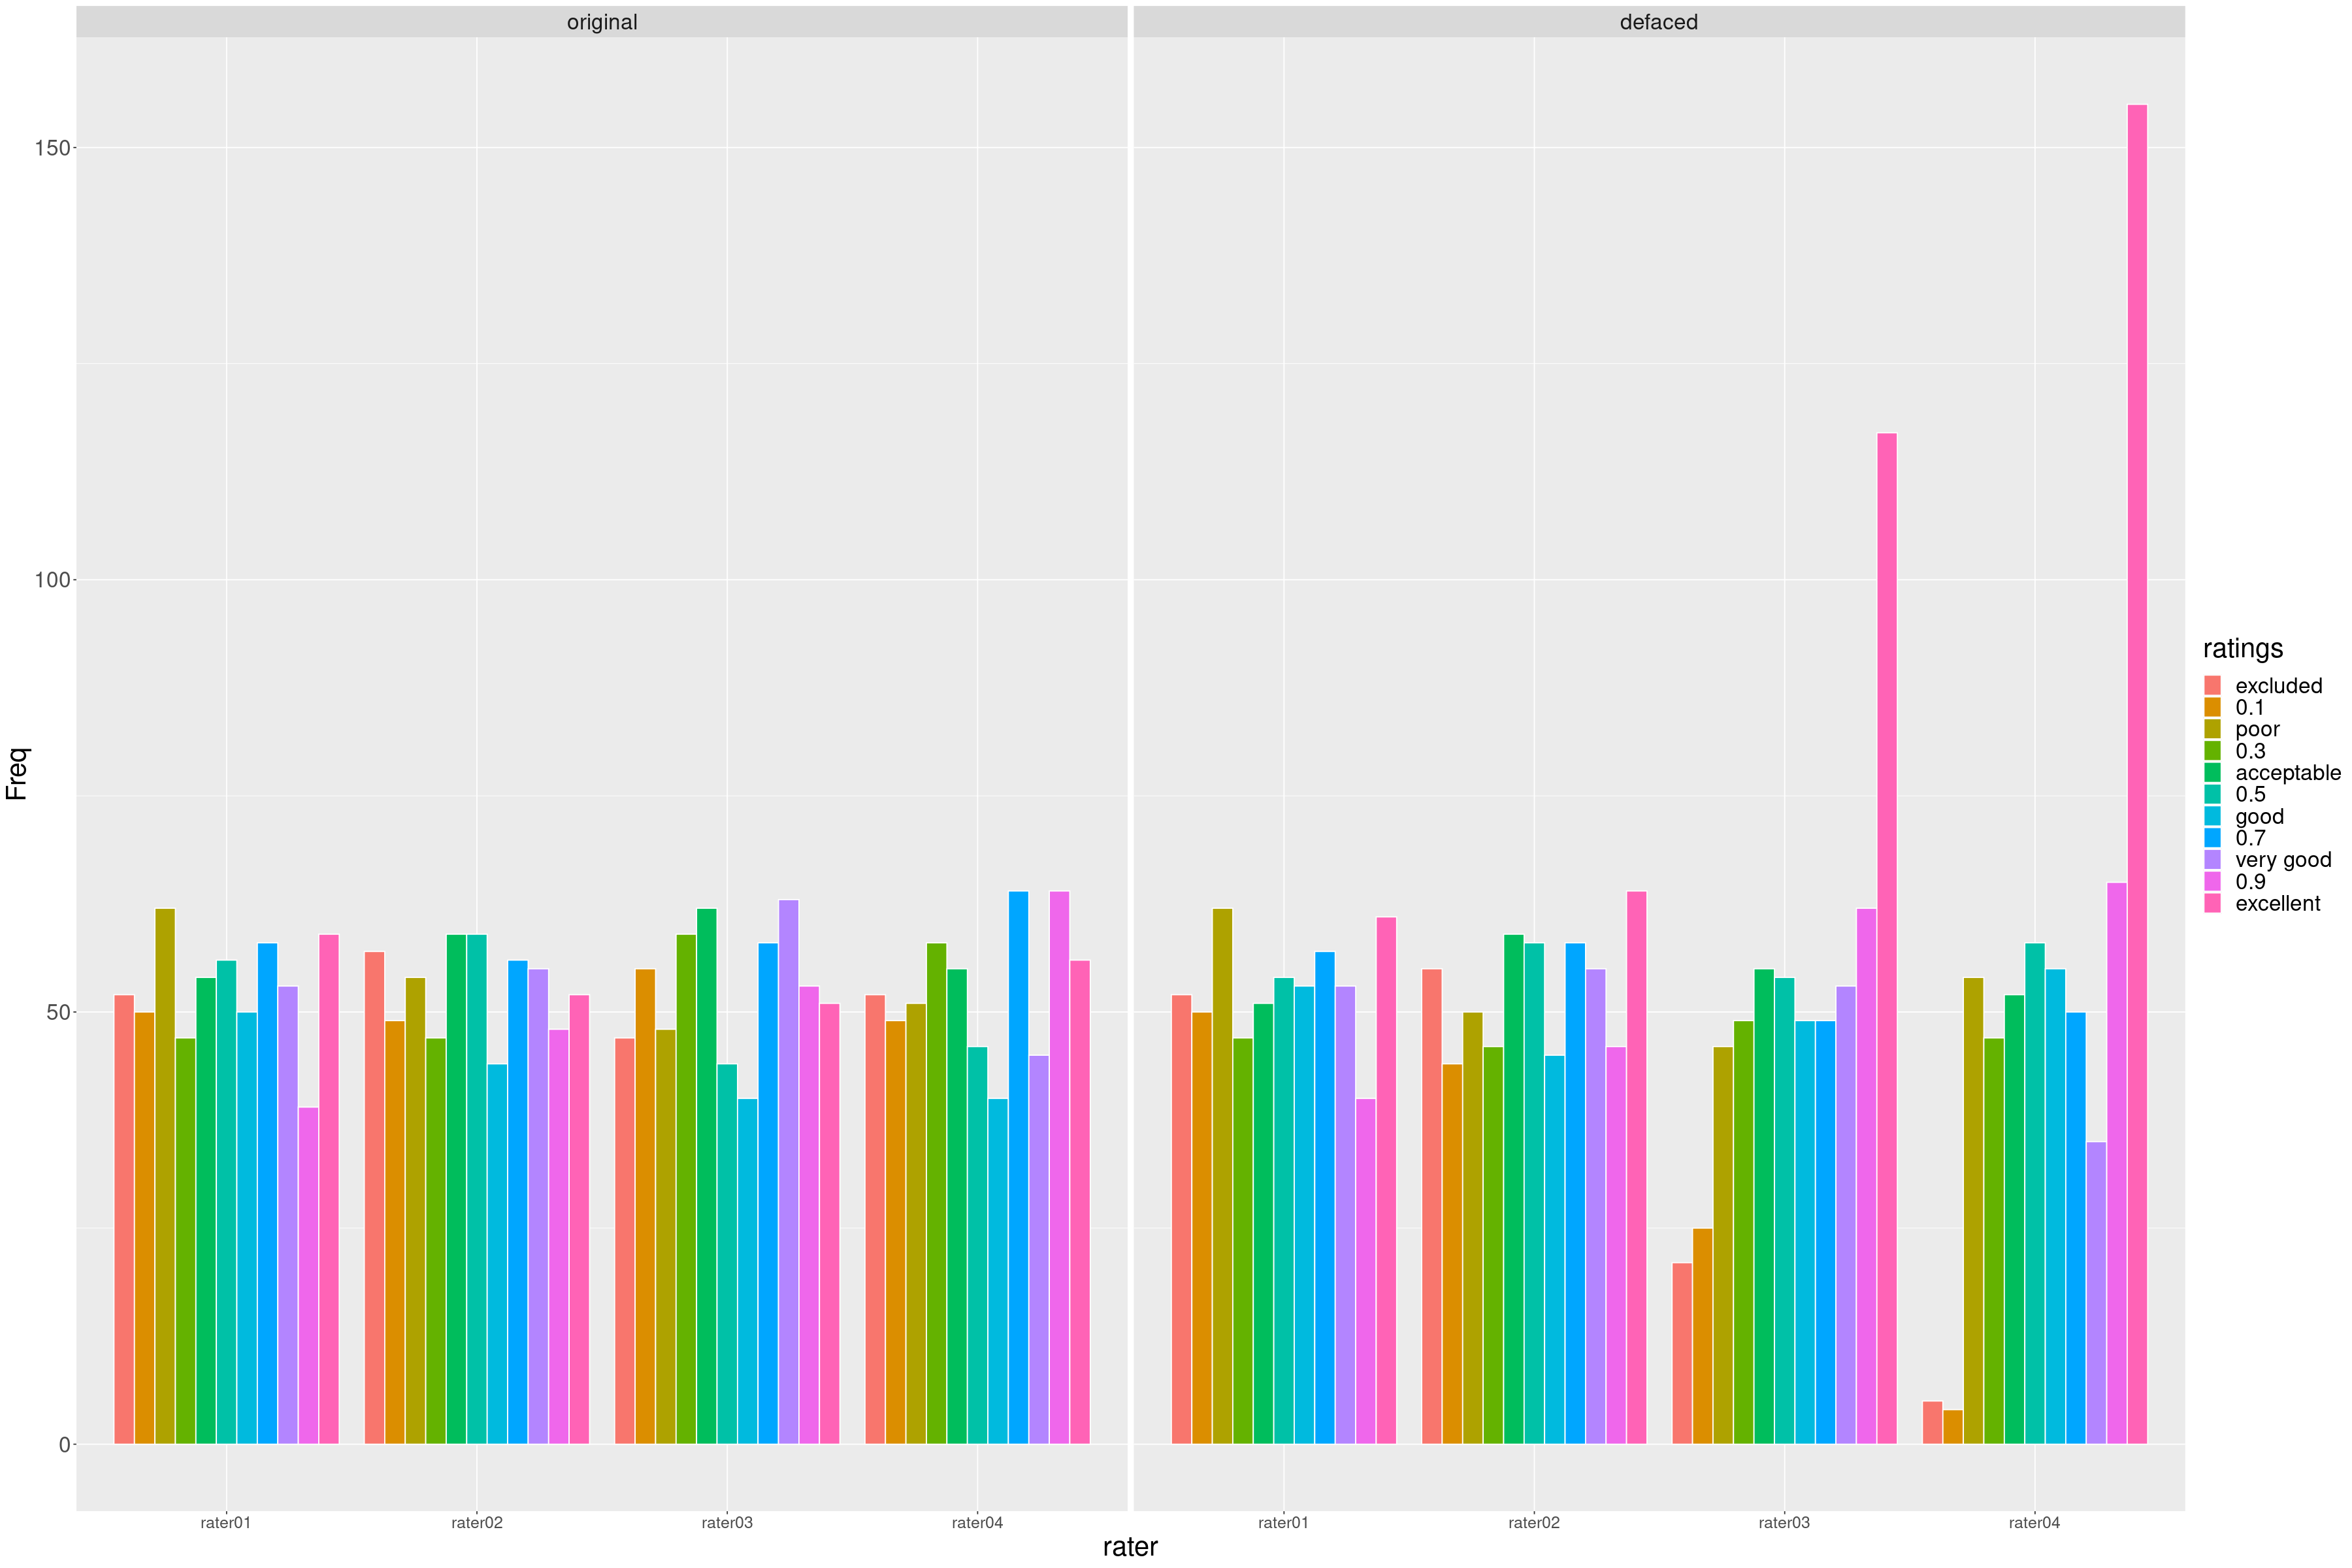

In [ ]:
library(ggplot2)
## Bar plot
ggplot(df_cont_freq, aes(x = rater, y = Freq))+
  geom_bar(
    aes(fill = ratings), stat = "identity", color = "white",
    position = position_dodge(0.9) 
    )+
  facet_wrap(~defaced)+
  theme(text = element_text(size = 25))+
  theme(axis.text.x = element_text(size = 15))

## Other plots attempt

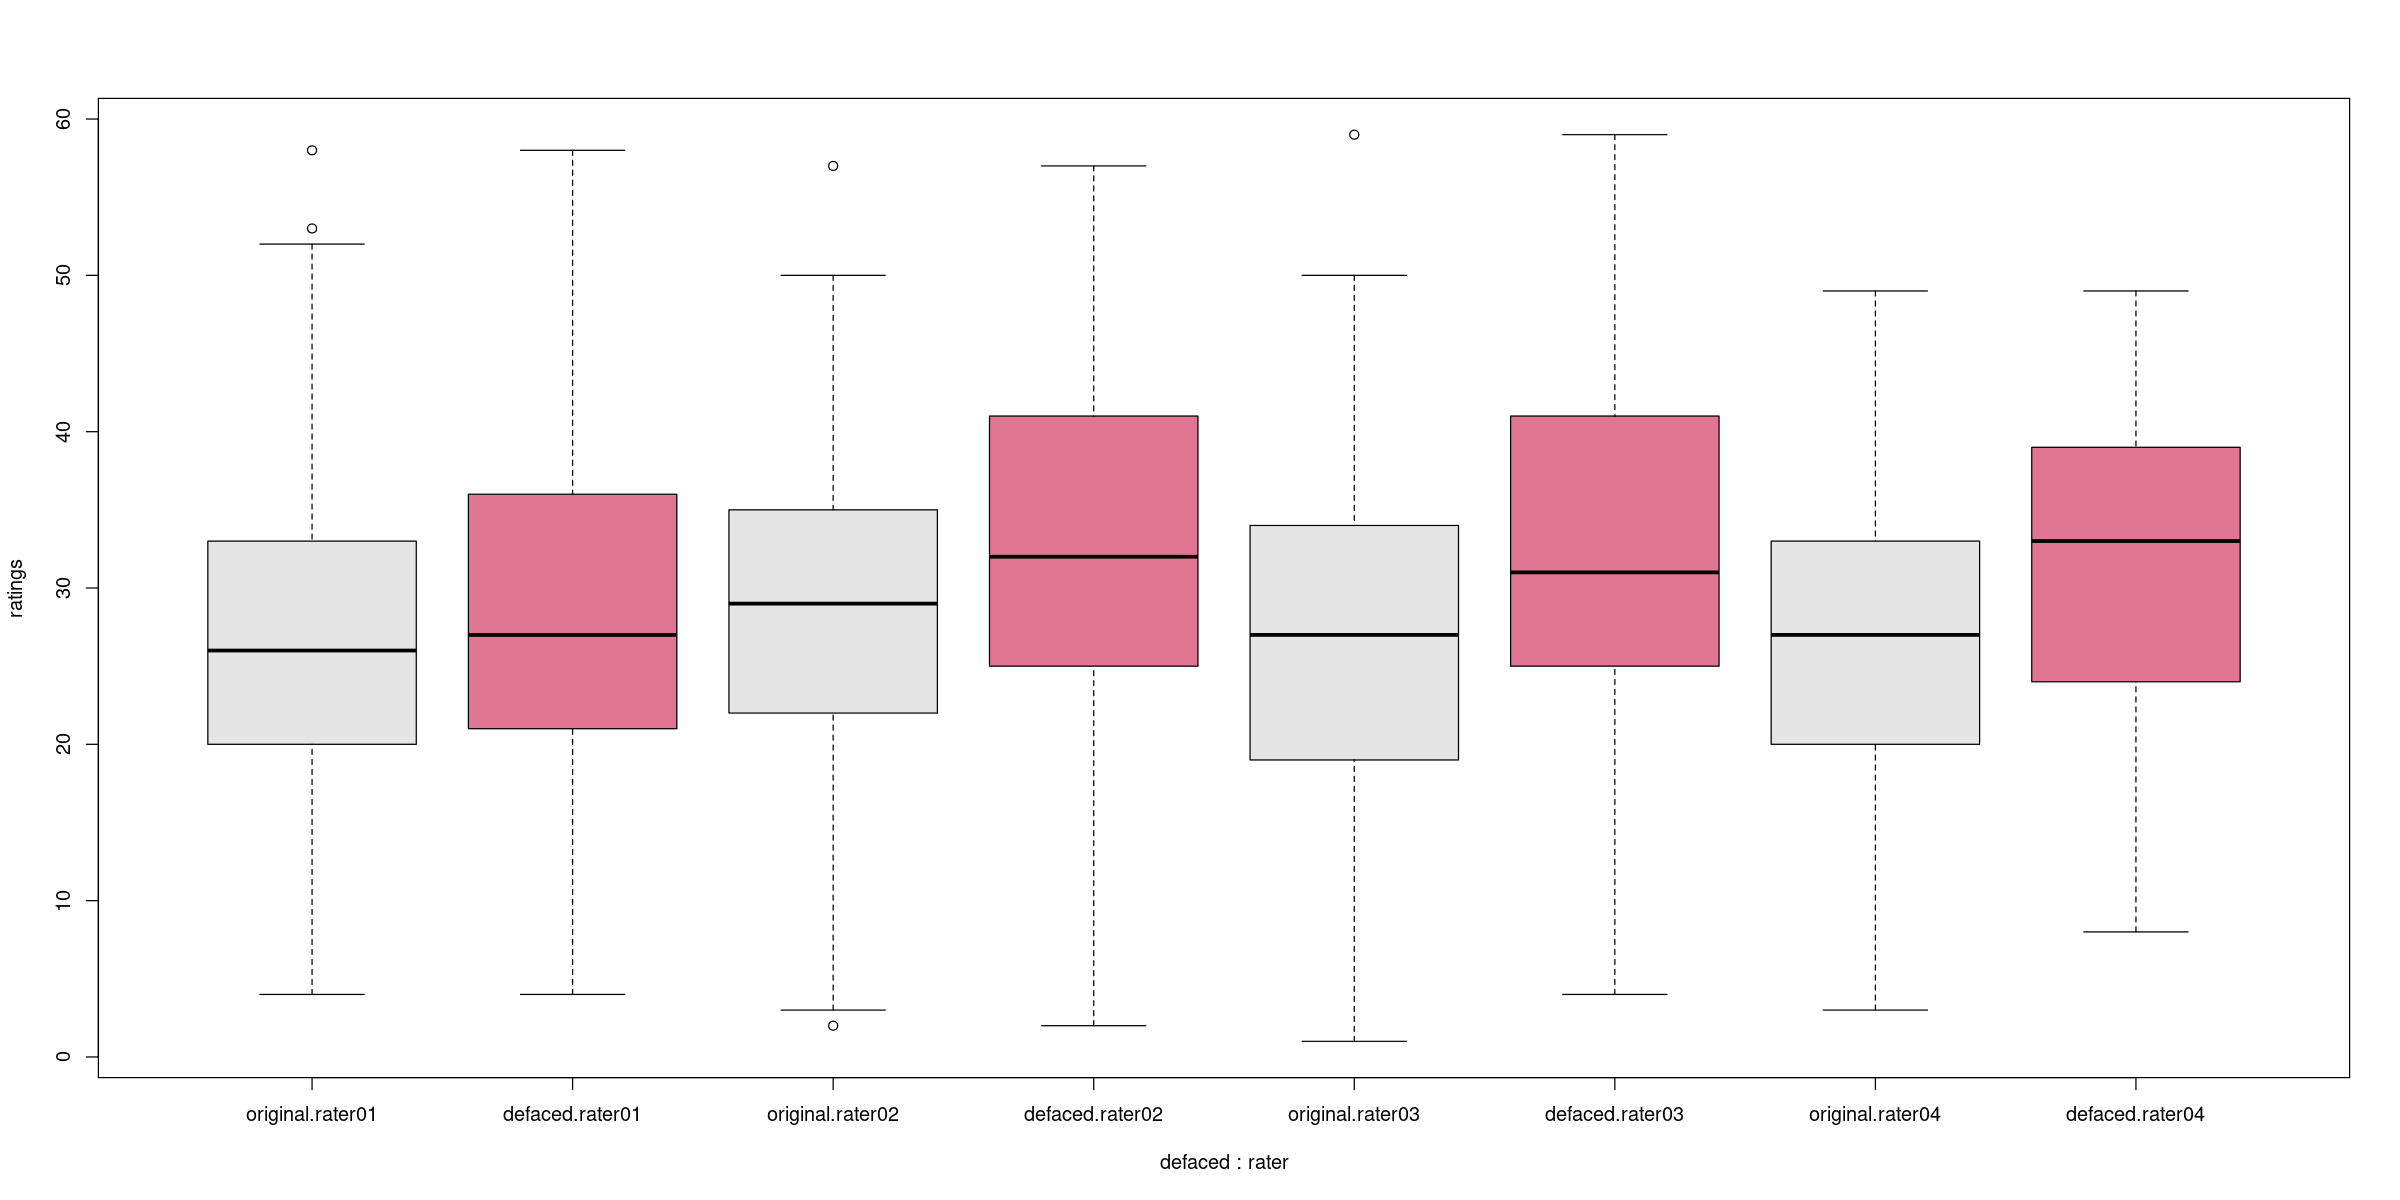

In [5]:
## Boxplot
#change size of displayed plot
library(repr)
options(repr.plot.width=20, repr.plot.height=10)

#create color vector
myColors <- ifelse(levels(df$defaced)=="defaced" , rgb(0.8,0.1,0.3,0.6) , 
              ifelse(levels(df$defaced)=="original", "grey90",
              "grey90" ) )

boxplot(ratings~defaced+rater, data=df, col=myColors)

#Add legend
legend(22,1.5, legend = c("Original","Defaced") , bg='lightblue',
    col = c('grey90', rgb(0.8,0.1,0.3,0.6)) , bty = "n", pch=20 , pt.cex = 3, 
    cex = 1, horiz = FALSE, inset = c(0.03, 0.1), box.lty=1)

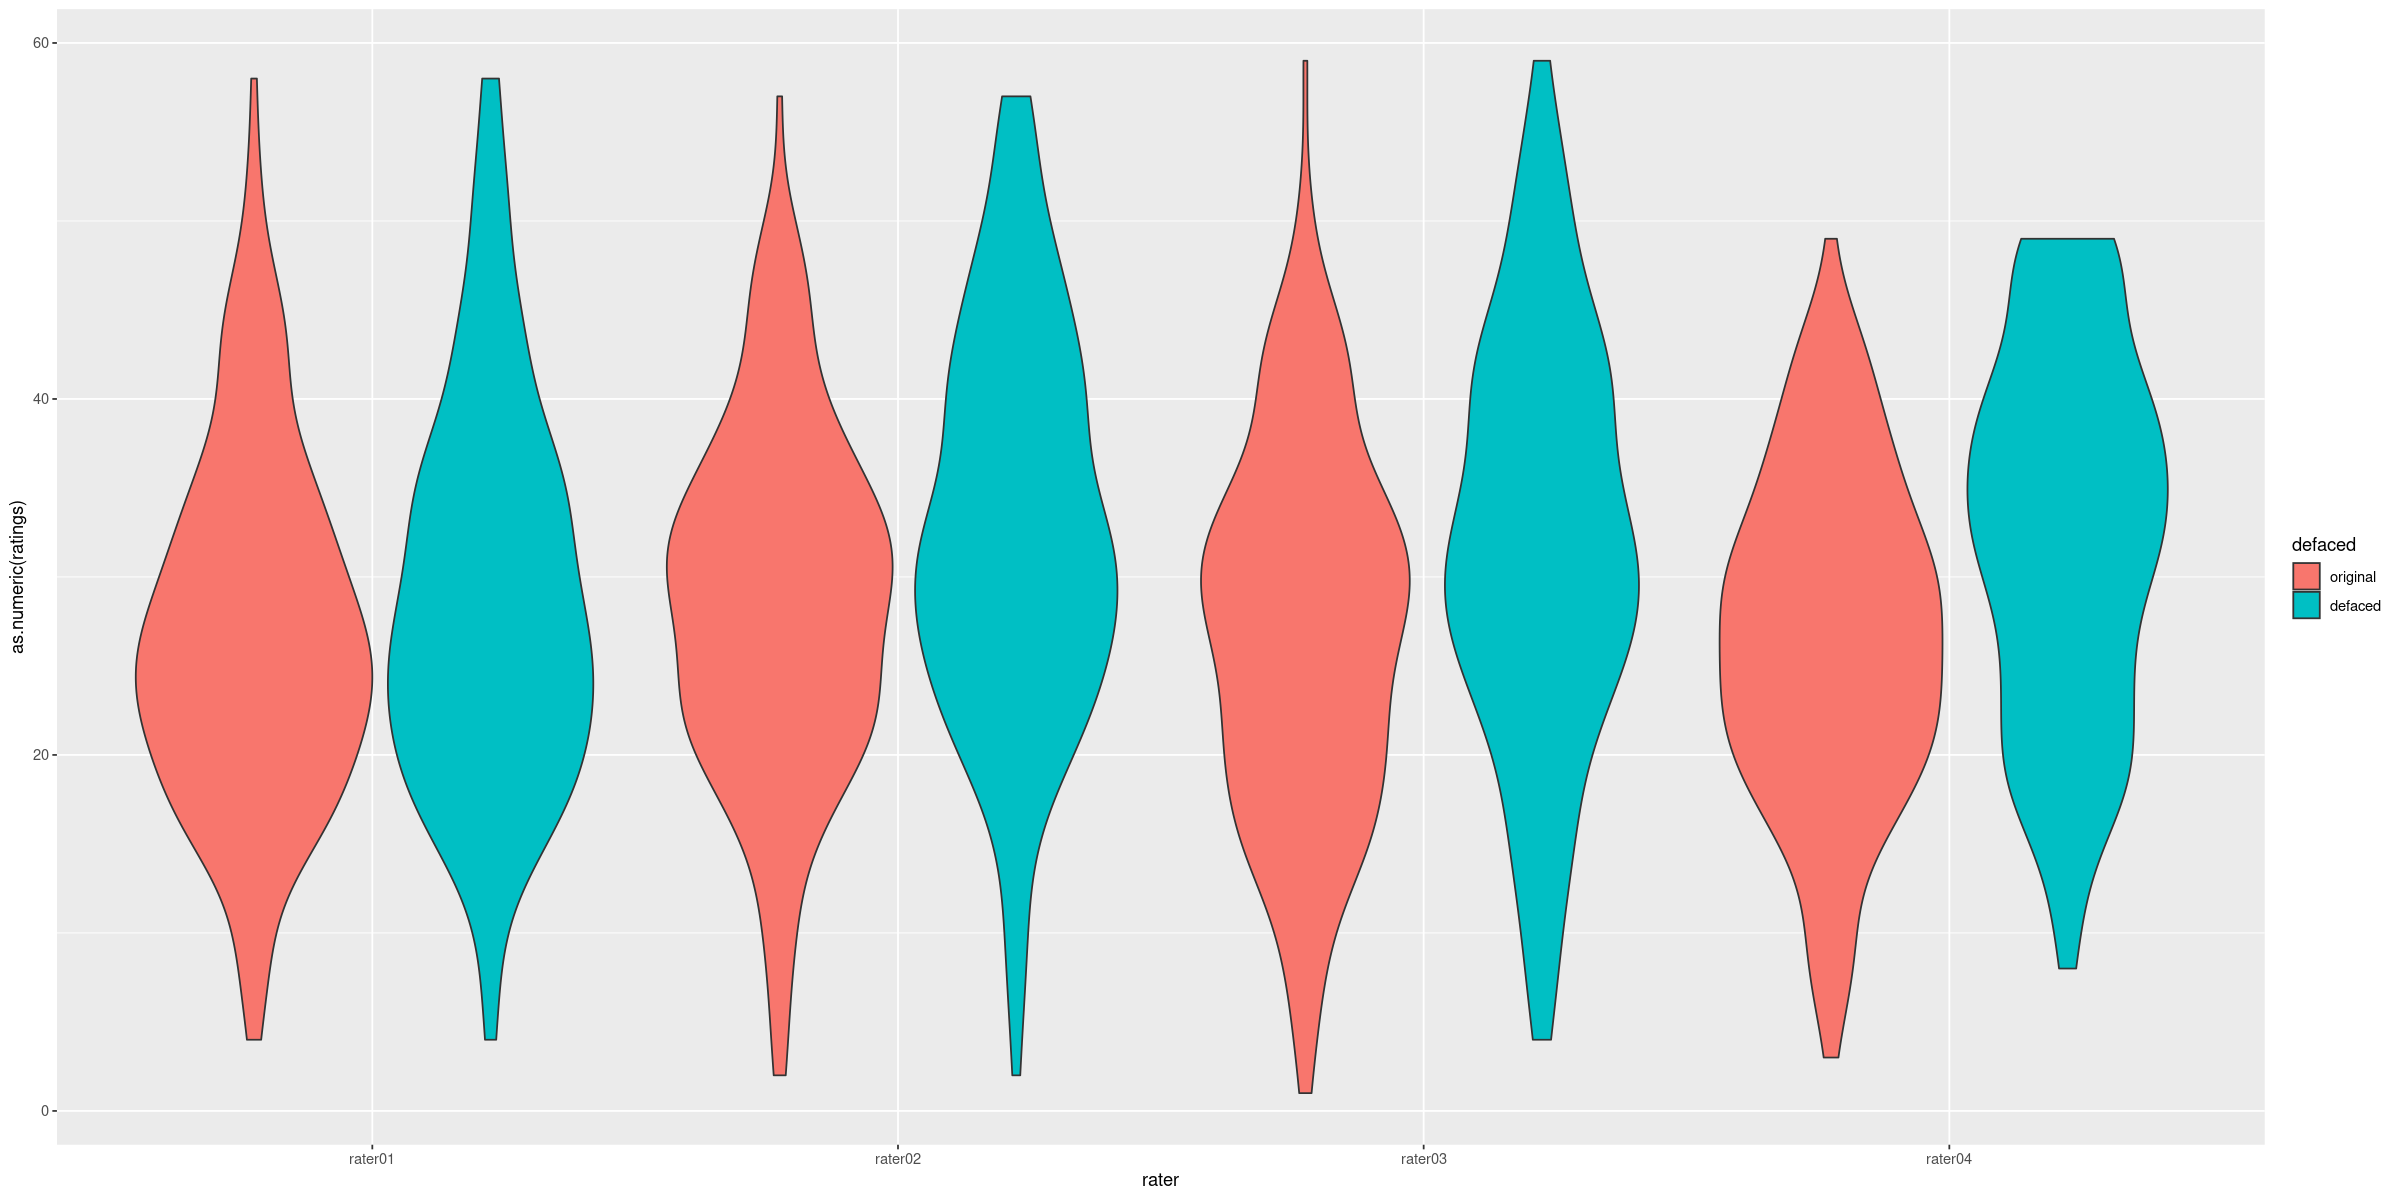

In [6]:
## Violinplot
library(ggplot2)
p <- ggplot(df, aes(x=rater, y=as.numeric(ratings), fill=defaced)) + geom_violin()
p

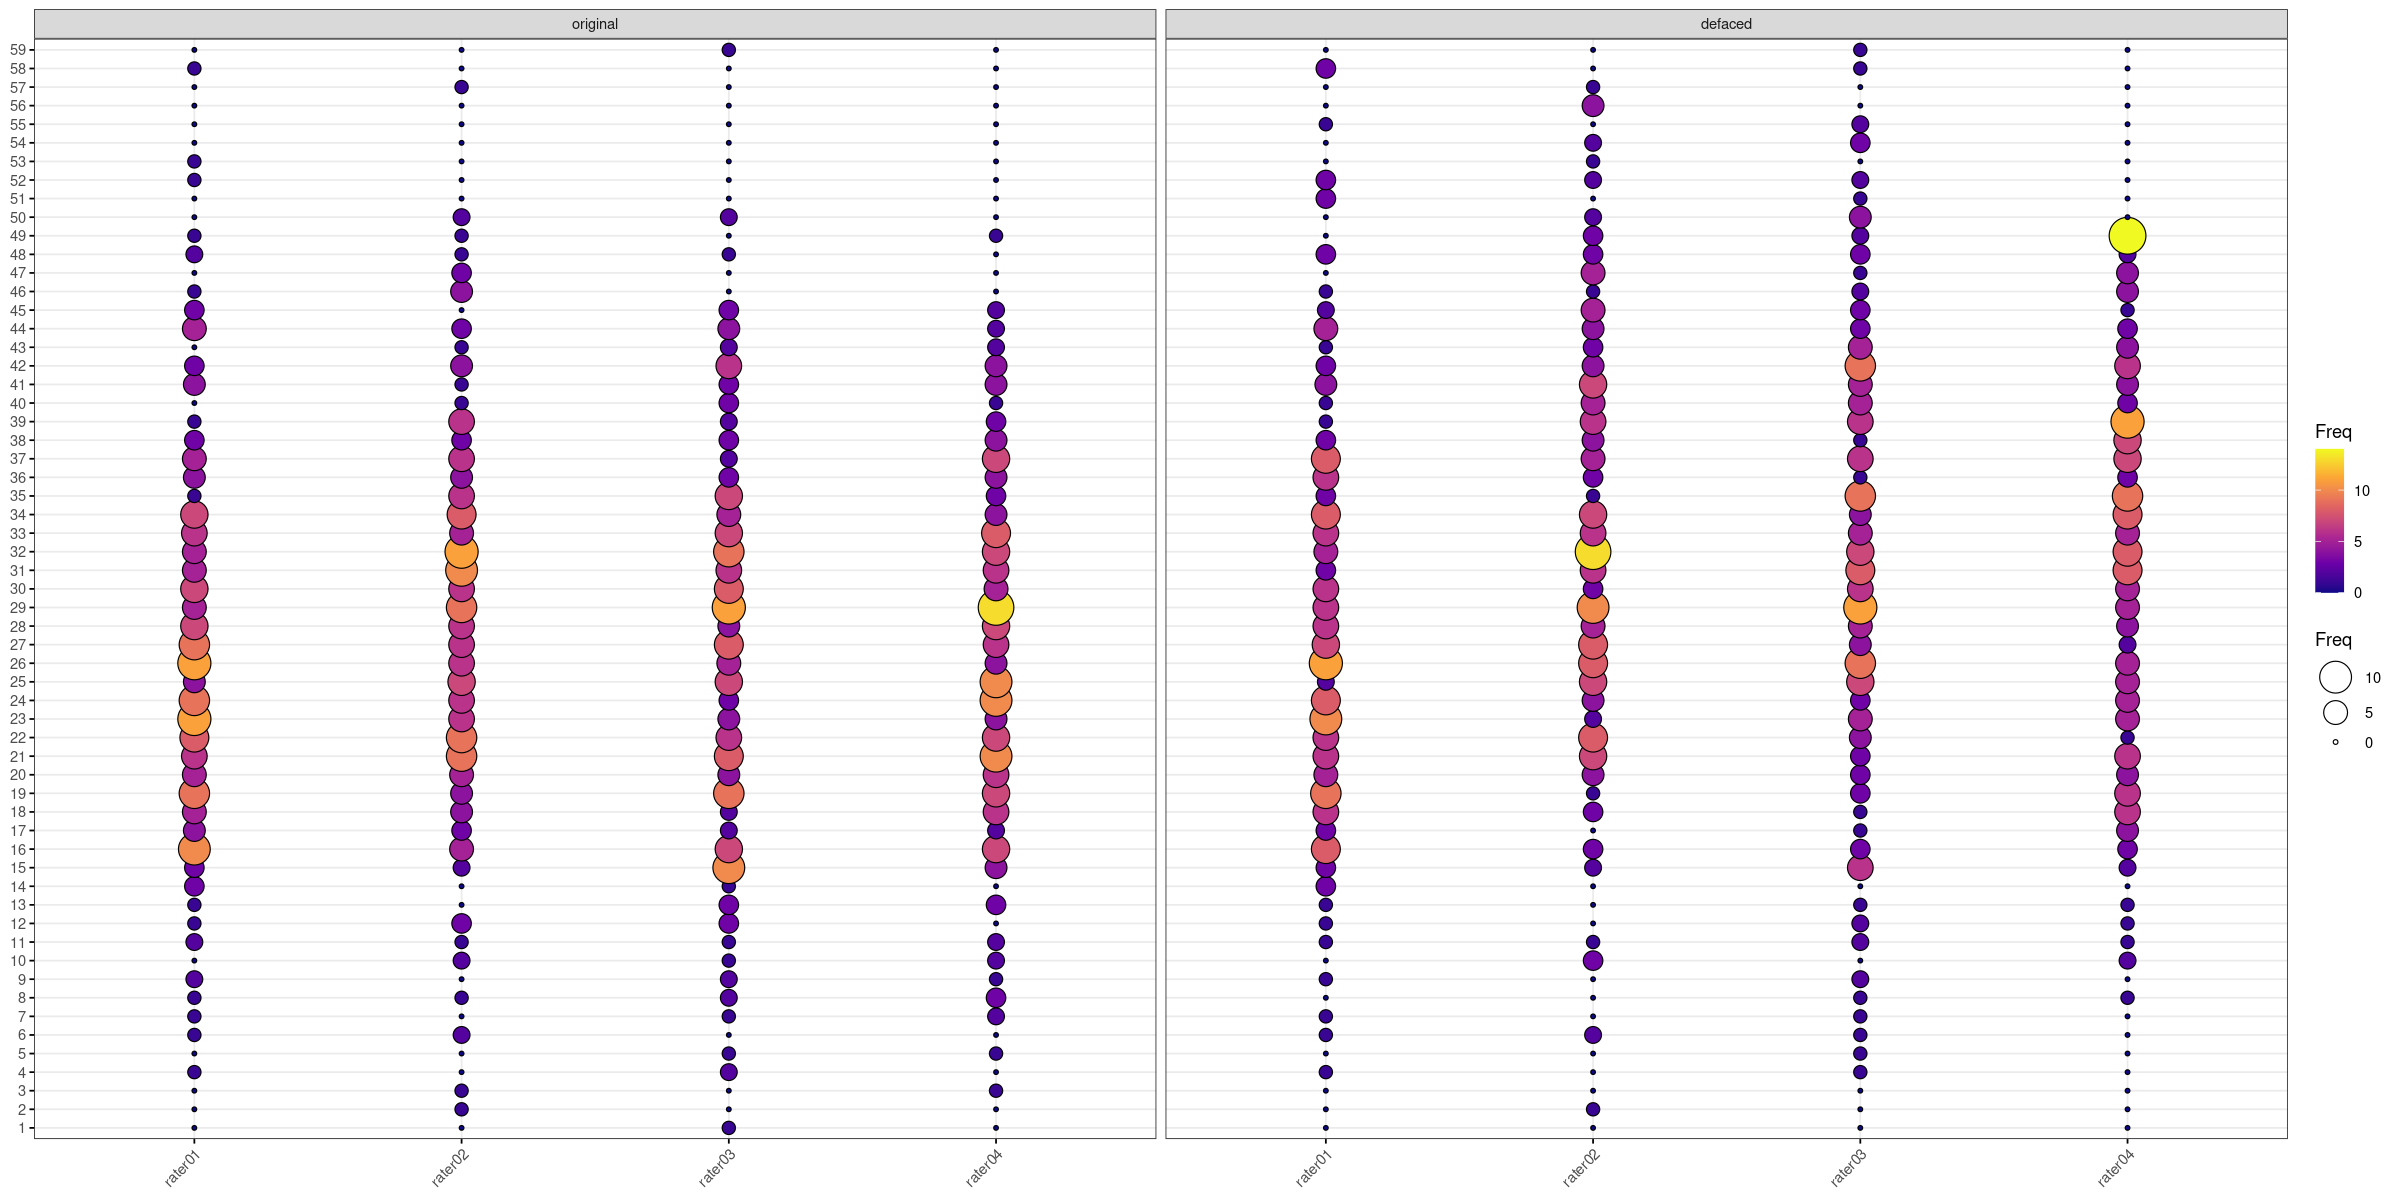

In [8]:
## Balloon plot
library(ggpubr)
ggballoonplot(df_freq, x = "rater", y = "ratings", size = "Freq",
              fill = "Freq", facet.by = "defaced",
              ggtheme = theme_bw()) +
  scale_fill_viridis_c(option = "C")